# Desafio Natural Language Processing with Disaster Tweets

In [155]:
import pandas as pd
import numpy as np
import zipfile
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import csr_matrix
from tqdm import tqdm

In [77]:
zf = zipfile.ZipFile('./data/nlp-getting-started.zip')
train = pd.read_csv(zf.open('train.csv'))
test = pd.read_csv(zf.open('test.csv'))

In [28]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [29]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


- A coluna 'keyword' tem potencial, ja que no treino e no teste tem poucos dados faltantes
    - Preencher com label 'faltante' nos faltantes

In [32]:
word_tokenize(train['text'][200])

['HAPPENING',
 'NOW',
 '-',
 'HATZOLAH',
 'EMS',
 'AMBULANCE',
 'RESPONDING',
 'WITH',
 'DUAL',
 'SIRENS',
 'AND\x89Û_',
 'https',
 ':',
 '//t.co/SeK6MQ6NJF']

In [33]:
stop_words_nltk = list(stopwords.words('english'))
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(train['text'].values)

In [34]:
csr_matrix(count_train).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
train['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [36]:
# Checando a tokenizacao

word_tokenize(train['text'][0])

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

## Tweet tokenizer

In [78]:
from nltk.tokenize import TweetTokenizer

def tweet_tokenize_column(df, column):
    """ 
        This function gets the Dataframe and the name of a column (String) containing texts (Strings) and returns
        a list of lists containing the tokenized text. It also turns every token to it's lower form.
        
        Input: Pandas DataFrame, String
        Return: Nested List
    """
    
    tweet_tokenizer = TweetTokenizer()
    
    # List of sentences
    list_sent = [tweet_tokenizer.tokenize(sent) for sent in df[column].values]
    
    # List of sentences excluding stopword tokens
    list_sent_no_stop = [[token.lower() 
                           for token in sent 
                           if token not in stopwords.words('english')] 
                           for sent in list_sent]
    
    
    
    return list_sent_no_stop

In [79]:
tokenized_sent_train = tweet_tokenize_column(train,'text')
tokenized_sent_test = tweet_tokenize_column(test,'text')

In [80]:
tokenized_sent_train[:2]

[['our', 'deeds', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada']]

In [81]:
tokenized_sent_test[:2]

[['just', 'happened', 'terrible', 'car', 'crash'],
 ['heard',
  '#earthquake',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.']]

Aplicando o TF-IDF nos datasets. Esses tem como caracteristicas:
- Contem palavras somente em letra minuscula
- Nao tem stopwords
- Foi tokenizado com o TweetTokenizer

In [82]:
# Funcao auxiliar para bypass do tokenizador, uma vez que este passo ja foi feito.
def identity_tokenizer(text):
    return text

tfidf_train = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)    
tfidf_train_fit = tfidf_train.fit_transform(tokenized_sent_train)

tfidf_train.get_feature_names()[50:60]

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['#abha',
 '#ableg',
 '#abomb',
 '#abstorm',
 '#accident',
 '#accidentalprophecy',
 '#acenewsdesk',
 '#achedin',
 '#act',
 '#actionmoviestaughtus']

In [83]:
tfidf_test = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)    
tfidf_test_fit = tfidf_test.fit_transform(tokenized_sent_test)

tfidf_test.get_feature_names()[50:60]

['#amtrak',
 '#amwriting',
 '#anchorage',
 '#ancient',
 '#animalrescue',
 '#anime',
 '#anonymous',
 '#anthrax',
 '#anti-terrorism',
 '#anticipate']

In [84]:
print("TF-IDF DataFrame dimensions: {}\n".format(tfidf_train_fit.toarray().shape))
print("TF-IDF Number or Features: {}\n".format(len(tfidf_train.get_feature_names())))

TF-IDF DataFrame dimensions: (7613, 22900)

TF-IDF Number or Features: 22900



Faz sentido, ja que o numero de colunas do ``tfidf_train_fit`` corresponde ao numero de tokens, e a contagem do ``tfidf_train.get_feature_names()`` tambem. 

In [85]:
# Criando dataframes de treino e teste pos TF-IDF

tfidf_train_df = pd.DataFrame(tfidf_train_fit.toarray(), columns=tfidf_train.get_feature_names())
tfidf_test_df = pd.DataFrame(tfidf_test_fit.toarray(), columns=tfidf_test.get_feature_names())

In [86]:
tfidf_train_df.head(3)

,!,#,##book,##fukushima,##youtube,#0215,#034,#039,#06,#09,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
tfidf_test_df.head(3)

,!,#,#039,#05,#0518,#12k,#16,#1oak,#21dayfix,#26,...,ûïyou,ûò,ûò7,ûòdon,ûó,ûócategorically,ûókaiserjaegers,ûókill,ûówe,ûówere
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
train['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [89]:
tfidf_train_df['reason']

0       0.384545
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
7608    0.000000
7609    0.000000
7610    0.000000
7611    0.000000
7612    0.000000
Name: reason, Length: 7613, dtype: float64

Observamos acima que a palavra 'reason' tem score na primeira sentenca. Isso e coerente ja que ela aparece na primeira linha do dataframe de treino.

In [90]:
intersect_columns = list(set(tfidf_train_df.columns).intersection(set(tfidf_test_df.columns)))

In [91]:
tfidf_train_df_int = tfidf_train_df[intersect_columns]
tfidf_test_df_int = tfidf_test_df[intersect_columns]

In [95]:
# Acrescentando o target ao dataframe

tfidf_train_df_int["target_column"] = train["target"]
tfidf_test_df_int["target_column"] = 0

<ipython-input-95-2c61ee63dfd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_train_df_int["target_column"] = train["target"]
<ipython-input-95-2c61ee63dfd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_test_df_int["target_column"] = 0


In [111]:
tfidf_train_df_int.head(3)

,perished,testimonials,casino,tumblr,upstairs,homeowners,profile,we've,burned,burst,...,approaches,sounds,hidden,attack,#strategicpatience,#avalanche,dere,players,phone,target_column
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [112]:
tfidf_test_df_int.head(3)

,perished,testimonials,casino,tumblr,upstairs,homeowners,profile,we've,burned,burst,...,approaches,sounds,hidden,attack,#strategicpatience,#avalanche,dere,players,phone,target_column
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Selecao de atributos

In [113]:
from sklearn.feature_selection import mutual_info_classif, chi2

X = tfidf_train_df_int.drop("target_column", axis=1)
y = tfidf_train_df_int["target_column"]

chi = chi2(X,y)
chi = pd.Series(chi[0])
chi.index = intersect_columns
chi.sort_values(ascending=False, inplace=True)    



In [114]:
chi

?             3.781983e+01
california    2.935364e+01
:             2.461591e+01
suicide       2.447685e+01
killed        2.354441e+01
                  ...     
rat           8.197846e-07
finding       2.194984e-07
seasons       1.577692e-07
realise       4.038831e-08
2016          3.780602e-08
Length: 5985, dtype: float64

In [115]:
# mi = mutual_info_classif(tfidf_train_df_int.drop("target_column", axis=1), tfidf_train_df_int["target_column"])
# mi = pd.Series(mi)
# mi.index = intersect_columns
# mi.sort_values(ascending=False, inplace=True) 

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)

clf = LogisticRegression(random_state=16)

scores_logistic = cross_val_score(clf, X, y, cv=5)

In [119]:
scores_logistic.mean()

0.7026216498145389

In [139]:
scores_logistic_3000 = cross_val_score(clf, X[chi[:3000].index], y, cv=5)

In [141]:
scores_logistic_3000.mean()

0.7337513362778181

In [202]:
atts = np.linspace(1,5986,200)
list_scores = []
list_var = []

for att in tqdm(atts):
    
    list_scores.append(cross_val_score(clf, X[chi[:int(att)].index], y, cv=5).mean())
    list_var.append(cross_val_score(clf, X[chi[:int(att)].index], y, cv=5).var())
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [24:50<00:00,  7.45s/it]


In [203]:
int_atts = [int(att) for att in atts]

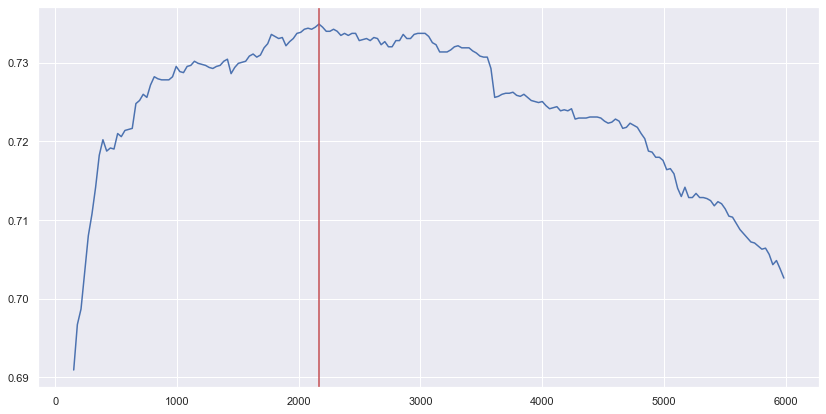

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=list_scores[5:], x=int_atts[5:])
plt.axvline(x=int_atts[np.array(list_scores[5:]).argmax()+5], color='r')
# plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.show()

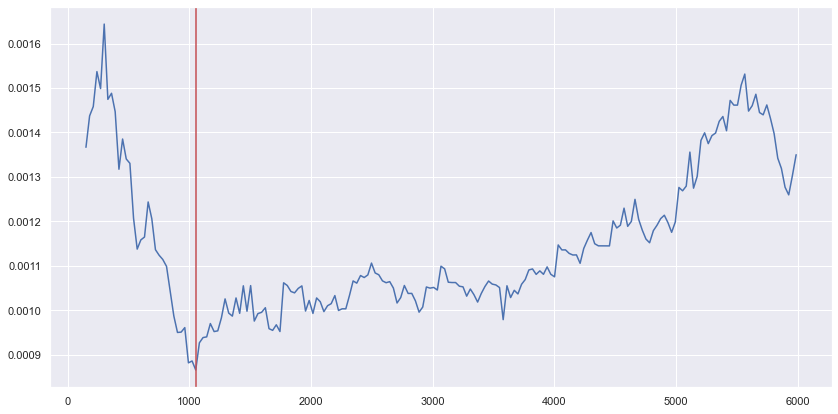

In [214]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=list_var[5:], x=int_atts[5:])
plt.axvline(x=int_atts[np.array(list_var[5:]).argmin()+5], color='r')
# plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.show()

In [206]:
int_atts[np.array(list_scores).argmax()]

2166

In [207]:
scores_logistic_2166 = cross_val_score(clf, X[chi[:2166].index], y, cv=10)

In [208]:
scores_logistic_2166

array([0.73884514, 0.70209974, 0.69685039, 0.6911958 , 0.72404731,
       0.6977661 , 0.72141919, 0.70302234, 0.79237845, 0.80026281])

In [218]:
# from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier(criterion="entropy")

# scores_tree = cross_val_score(tree, X, y, cv=5)


In [219]:
# scores_tree.mean()

In [220]:
# X_tree = tfidf_df.loc[:,~(tfidf_df.columns == 'target_column')]
# Y_tree = tfidf_df.target_column

# accuracy_test = []

# kf = KFold(n_splits=10)

# X = X_tree.values
# y = Y_tree.values

# for train_index, test_index in kf.split(X_tree):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     tree = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.001226509672564484)
    
#     tree.fit(X_train, y_train)
#     y_test_pred = tree.predict(X_test)
#     accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))


# st.t.interval(0.99, len(accuracy_test) - 1, loc=np.mean(accuracy_test), scale=st.sem(accuracy_test))

## To-Do
- Selecionar variaveis mais importantes (Chi^2 | Informacao Mutua)
- Selecionar colunas contendo essas variaveis tanto no treino quanto no teste
- Testar selecao de variaveis antes para todos os tokens do treino
- Testar outros modelos (SVC, NaiveBayes, RidgeClassifier, ...)
